In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm, tree, neighbors, discriminant_analysis, naive_bayes, linear_model, ensemble, gaussian_process
import pandas.util.testing as tm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\Anggi Firdian Saputr\AppData\Local\Temp\ipykernel_16896\445618899.py:21: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Business Objective

1. Get a company that is an opportunity as a big buyer
2. Find out which products are interested in buying
3. Finding trends in company opportunities that become customers

In [2]:
# Reading offer file
offers = pd.read_csv('offers.csv')

offers.head()

,offer,category,quantity,company,offervalue,brand
0,1190530,9115,1,108500080,5.00,93904
1,1194044,9909,1,107127979,1.00,6732
2,1197502,3203,1,106414464,0.75,13474
3,1198271,5558,1,107120272,1.50,5072
4,1198272,5558,1,107120272,1.50,5072


In [49]:
#Check dimension of the dataframe offers
offers.shape

(37, 6)

In [50]:
#Check for the unique values
offers.nunique()

offer         37
category      20
quantity       2
company       18
offervalue     7
brand         19
dtype: int64

In [51]:
#There is no missing values
offers.isnull().sum()

offer         0
category      0
quantity      0
company       0
offervalue    0
brand         0
dtype: int64

In [52]:
offers.duplicated().sum()

0

In [53]:
offers_missing_data = offers.isnull()

for column in offers_missing_data.columns.values.tolist():
    print(column)
    print(offers_missing_data[column].value_counts())
    print("")

offer
False    37
Name: offer, dtype: int64

category
False    37
Name: category, dtype: int64

quantity
False    37
Name: quantity, dtype: int64

company
False    37
Name: company, dtype: int64

offervalue
False    37
Name: offervalue, dtype: int64

brand
False    37
Name: brand, dtype: int64



#There is no missing value. We can do in the next steps to plot the data

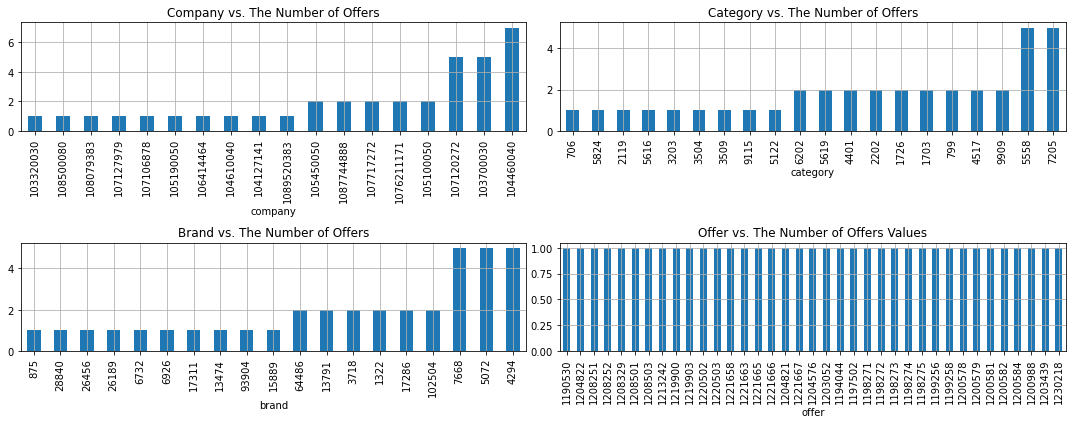

In [54]:
#Show the model of each element
fig, axes = plt.subplots(2,2, figsize = (15,6))
offers_group_company = offers.groupby('company')['offer'].count().sort_values()
offers_group_company.plot(kind = 'bar', title = 'Company vs. The Number of Offers', grid = True, ax = axes[0,0])

offers_group_category = offers.groupby('category')['offer'].count().sort_values()
offers_group_category.plot(kind = 'bar', title = 'Category vs. The Number of Offers', grid = True, ax = axes[0,1])

offers_group_brand = offers.groupby('brand')['offer'].count().sort_values()
offers_group_brand.plot(kind = 'bar', title = 'Brand vs. The Number of Offers', grid = True, ax = axes[1,0])

offers_group_offer = offers.groupby('offer')['offervalue'].count().sort_values()
offers_group_offer.plot(kind = 'bar', title = 'Offer vs. The Number of Offers Values', grid = True, ax = axes[1,1])

plt.tight_layout()

Based on the graph:
- The top company by offer is 104460040
- The top category by offer is 5558 and 7205
- The top brand by offer is 4294

In [39]:
offer_group = offers.groupby(['company','category','brand'])['offer'].count().sort_values(ascending=False)
offer_group

company     category  brand 
107120272   5558      5072      5
103700030   7205      4294      5
105450050   4517      1322      2
1087744888  6202      64486     2
104460040   1703      7668      2
            1726      7668      2
            2202      3718      2
1076211171  799       17286     2
105100050   4401      13791     2
107717272   5619      102504    2
108500080   9115      93904     1
108079383   2119      6926      1
107127979   9909      6732      1
103320030   3509      875       1
107106878   5122      17311     1
106414464   3203      13474     1
105190050   5824      26456     1
104610040   5616      15889     1
104460040   3504      7668      1
104127141   706       26189     1
1089520383  9909      28840     1
Name: offer, dtype: int64

<AxesSubplot:title={'center':'Product vs.The Number of Offers'}, xlabel='company,brand,category'>

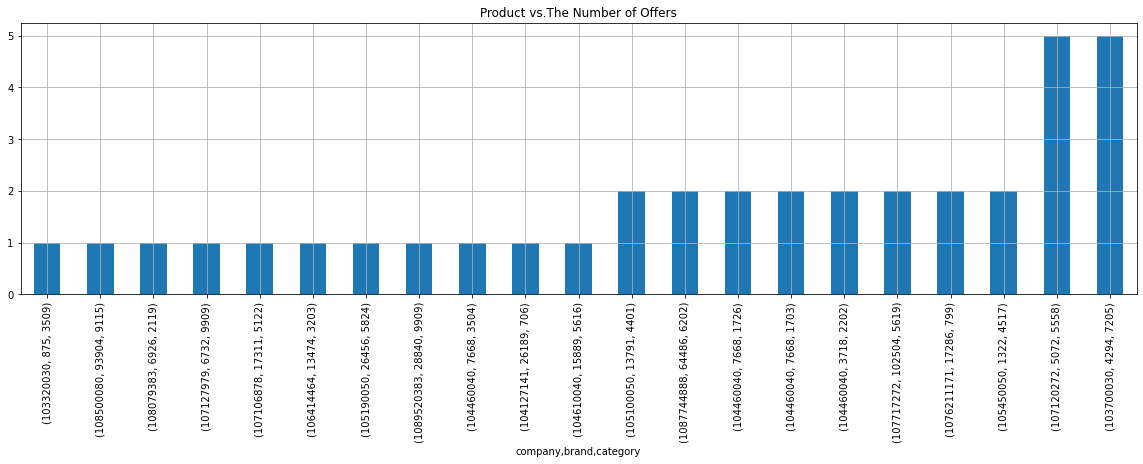

In [55]:
#Show how many offers
offers_groupby_three = offers.groupby(['company','brand','category'])['offer'].size().sort_values()
offers_groupby_three.plot(kind='bar', title='Product vs.The Number of Offers', grid=True, figsize=(20,5))

In [56]:
#Check how many offer need
offers.quantity.value_counts()

1    36
2     1
Name: quantity, dtype: int64

#There are 36 values for 1 quantity, and 1 for 2 quantity.

In [57]:
offers.head()

,offer,category,quantity,company,offervalue,brand
0,1190530,9115,1,108500080,5.00,93904
1,1194044,9909,1,107127979,1.00,6732
2,1197502,3203,1,106414464,0.75,13474
3,1198271,5558,1,107120272,1.50,5072
4,1198272,5558,1,107120272,1.50,5072


In [58]:
offers_groupby = offers.groupby(['company','brand','category'])['offer'].nunique()
offers_groupby

company     brand   category
103320030   875     3509        1
103700030   4294    7205        5
104127141   26189   706         1
104460040   3718    2202        2
            7668    1703        2
                    1726        2
                    3504        1
104610040   15889   5616        1
105100050   13791   4401        2
105190050   26456   5824        1
105450050   1322    4517        2
106414464   13474   3203        1
107106878   17311   5122        1
107120272   5072    5558        5
107127979   6732    9909        1
107717272   102504  5619        2
108079383   6926    2119        1
108500080   93904   9115        1
1076211171  17286   799         2
1087744888  64486   6202        2
1089520383  28840   9909        1
Name: offer, dtype: int64

In [59]:
offers_groupby_three = offers.groupby(['company','brand','category'])['offer','quantity','offervalue'].nunique()
offers_groupby_three

offer  quantity  offervalue
company    brand  category                             
103320030  875    3509          1         1           1
103700030  4294   7205          5         2           3
104127141  26189  706           1         1           1
104460040  3718   2202          2         1           2
           7668   1703          2         1           1
                  1726          2         1           1
                  3504          1         1           1
104610040  15889  5616          1         1           1
105100050  13791  4401          2         1           1
105190050  26456  5824          1         1           1
105450050  1322   4517          2         1           1
106414464  13474  3203          1         1           1
107106878  17311  5122          1         1           1
107120272  5072   5558          5         1           1
107127979  6732   9909          1         1           1
107717272  102504 5619          2         1           1
108079383  6926   2119          1         1           1
108500080  93904  9115          1         1           1
1076211171 17286  799           2         1           1
1087744888 64486  6202          2         1           1
1089520383 28840  9909          1         1           1

In [60]:
offers_groupby_three.shape

(21, 3)

If we look, there are offers made more than once. Maybe this will be our concern for brands that get offers more than once but the quantity and value of the offers are the same.

## ---------------------------------------------------Customer Histories---------------------------------------------------

In [3]:
history = pd.read_csv('trainHistory.csv')
history.head()

,id,chain,offer,market,repeattrips,repeater,offerdate
0,86246,205,1208251,34,5,t,2013-04-24
1,86252,205,1197502,34,16,t,2013-03-27
2,12682470,18,1197502,11,0,f,2013-03-28
3,12996040,15,1197502,9,0,f,2013-03-25
4,13089312,15,1204821,9,0,f,2013-04-01


In [62]:
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160057 entries, 0 to 160056
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           160057 non-null  int64 
 1   chain        160057 non-null  int64 
 2   offer        160057 non-null  int64 
 3   market       160057 non-null  int64 
 4   repeattrips  160057 non-null  int64 
 5   repeater     160057 non-null  object
 6   offerdate    160057 non-null  object
dtypes: int64(5), object(2)
memory usage: 8.5+ MB


The dtype of column offerdate is not correct, then we must change to datetime

In [63]:
history.isnull().sum()

id             0
chain          0
offer          0
market         0
repeattrips    0
repeater       0
offerdate      0
dtype: int64

In [64]:
history.nunique()

id             160057
chain             130
offer              24
market             34
repeattrips        56
repeater            2
offerdate          56
dtype: int64

This shows that out of 37 offers in the offer table, there are 24 offers in trainHistory table.

In [65]:
history.shape

(160057, 7)

In [66]:
history.duplicated().sum()

0

In [4]:
history['offerdate'] = pd.to_datetime(history['offerdate'])

In [68]:
history['offerdate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 160057 entries, 0 to 160056
Series name: offerdate
Non-Null Count   Dtype         
--------------   -----         
160057 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.2 MB


In [69]:
history.sort_values(by = 'repeattrips', ascending = False).head()

,id,chain,offer,market,repeattrips,repeater,offerdate
123859,3465135195,306,1197502,6,2124,t,2013-03-25
123678,3450535153,306,1197502,6,1418,t,2013-04-18
140693,4427711419,152,1203052,10,549,t,2013-04-02
138102,4176323168,166,1203052,14,104,t,2013-04-01
7839,239276354,116,1197502,4,87,t,2013-04-20


In [70]:
#See offer were given in the period
print('Ending date: ',history.offerdate.max())
print('Starting date: ',history.offerdate.min())
print('Offers were given in ', history.offerdate.max() - history.offerdate.min(), 'period')

Ending date:  2013-04-30 00:00:00
Starting date:  2013-03-01 00:00:00
Offers were given in  60 days 00:00:00 period


In [71]:
history.describe(include='all')

,id,chain,offer,market,repeattrips,repeater,offerdate
count,1.600570e+05,160057.000000,1.600570e+05,160057.000000,160057.000000,160057,160057
unique,NaN,NaN,NaN,NaN,NaN,2,56
top,NaN,NaN,NaN,NaN,NaN,f,2013-03-25 00:00:00
freq,NaN,NaN,NaN,NaN,NaN,116619,10922
first,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-30 00:00:00
mean,1.869324e+09,126.810311,1.201984e+06,19.950599,0.656335,NaN,NaN
std,1.570833e+09,127.934288,4.705531e+03,19.099009,6.786516,NaN,NaN
min,8.624600e+04,2.000000,1.194044e+06,1.000000,0.000000,NaN,NaN
25%,4.981822e+08,21.000000,1.197502e+06,10.000000,0.000000,NaN,NaN


This shows that the max trips are 2124 by a customer. Maybe had seem to be an outlier. We assume that there are normal repeatrips with a maximum value of 100, otherwise we identify them as outliers.

In [72]:
history[history.repeattrips > 100]

,id,chain,offer,market,repeattrips,repeater,offerdate
123678,3450535153,306,1197502,6,1418,t,2013-04-18
123859,3465135195,306,1197502,6,2124,t,2013-03-25
138102,4176323168,166,1203052,14,104,t,2013-04-01
140693,4427711419,152,1203052,10,549,t,2013-04-02


There are 3 potential outliers for number of trips

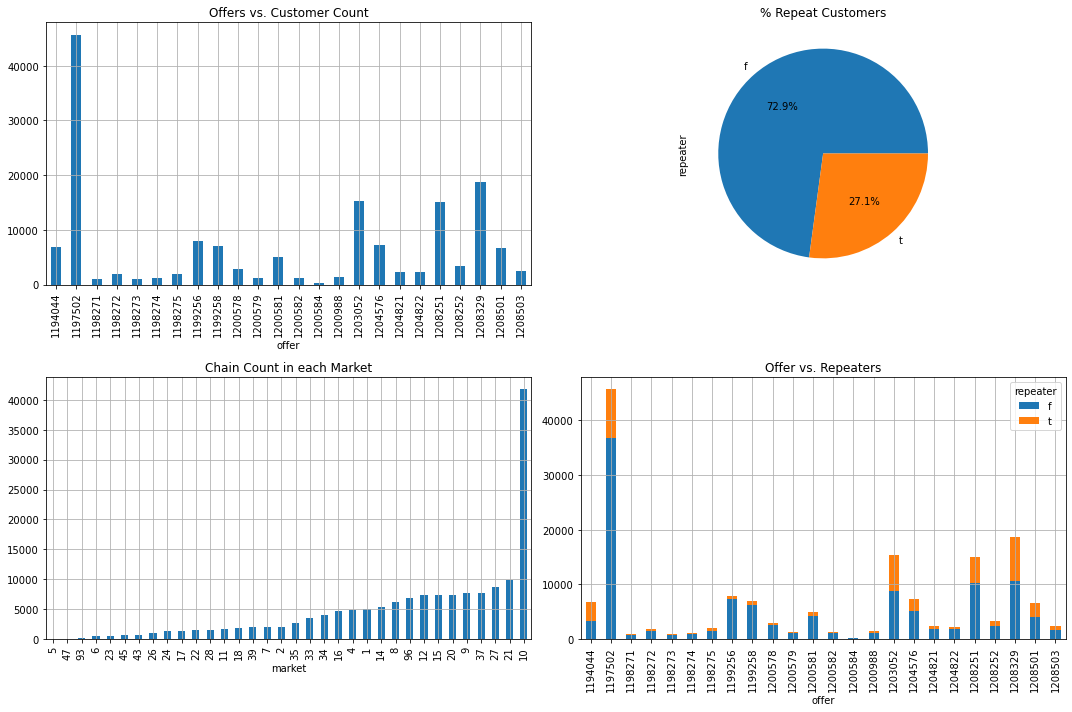

In [73]:
#Show of the given customers, how many are repeaters
#Show how many customers are offered a particular offer
#How many chains are in each market
#How many customers repeated after given a particular offer

fig, axes = plt.subplots(2,2, figsize=(15,10))
history_offer = history.groupby('offer')['id'].count()
history_offer.plot(kind='bar', title='Offers vs. Customer Count', grid=True, ax=axes[0,0])

history_repeater = history.repeater.value_counts()
history_repeater.plot(kind='pie', title='% Repeat Customers', ax=axes[0,1], autopct='%1.1f%%', textprops=dict(color="black"))

history_market = history.groupby('market')['chain'].count().sort_values()
history_market.plot(kind='bar', title='Chain Count in each Market', grid=True, ax=axes[1,0])

history_two = history.groupby(['offer','repeater']).size().unstack()

history_two.plot(kind='bar', title='Offer vs. Repeaters', grid=True, ax=axes[1,1], stacked=True)

plt.tight_layout()

In [5]:
#Merging trainHistory and Offers table 
history_merge = history.merge(offers, on = 'offer')
history_merge.shape
history_merge.head()

,id,chain,offer,market,repeattrips,repeater,offerdate,category,quantity,company,offervalue,brand
0,86246,205,1208251,34,5,t,2013-04-24,2202,1,104460040,2.0,3718
1,15753725,17,1208251,4,0,f,2013-04-24,2202,1,104460040,2.0,3718
2,16535563,4,1208251,1,7,t,2013-04-27,2202,1,104460040,2.0,3718
3,18259179,3,1208251,2,0,f,2013-04-24,2202,1,104460040,2.0,3718
4,21024070,15,1208251,9,1,t,2013-04-23,2202,1,104460040,2.0,3718


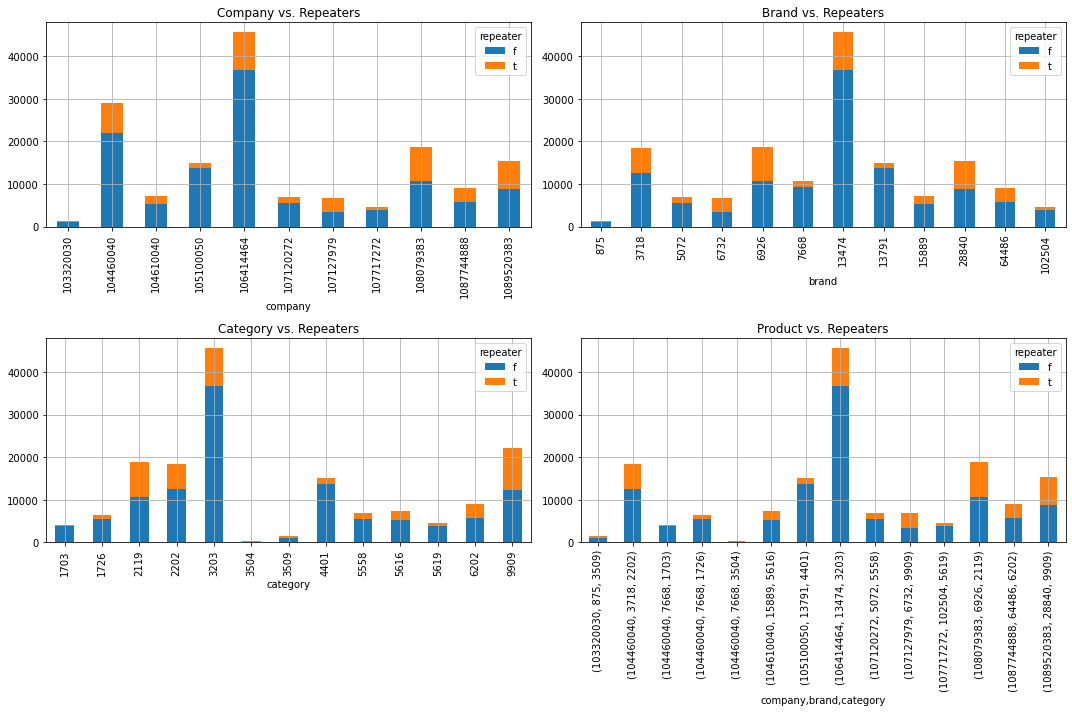

In [75]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
history_merge_cr = history_merge.groupby(['company','repeater']).size().unstack()
history_merge_cr.plot(kind='bar', title='Company vs. Repeaters', grid=True, stacked=True, ax=axes[0,0])

history_merge_br = history_merge.groupby(['brand','repeater']).size().unstack()
history_merge_br.plot(kind='bar', title='Brand vs. Repeaters', grid=True, stacked=True, ax=axes[0,1])

history_merge_car = history_merge.groupby(['category','repeater']).size().unstack()
history_merge_car.plot(kind='bar', title='Category vs. Repeaters', grid=True, stacked=True, ax=axes[1,0])

history_merge_cbcar = history_merge.groupby(['company','brand','category','repeater']).size().unstack()
history_merge_cbcar.plot(kind='bar', title='Product vs. Repeaters', grid=True, stacked=True, ax=axes[1,1])

plt.tight_layout()

From the graph above:
- Companies ending with 7979, 9383, 0383 have higher % of repeat customers than others
- Brand 6732, 6926, 28840 have the higher % repeat customers than others
- Catogories 2119, 9909 have higher % of repeat customers than other
- When combine all of them together to see exactly which product is getting higher repeat customers than average (7979,6732,9909), (9383,6926,2119) comes out to be the best ones. This shows is the same pattern as we saw individually in Company, Brand and Category 

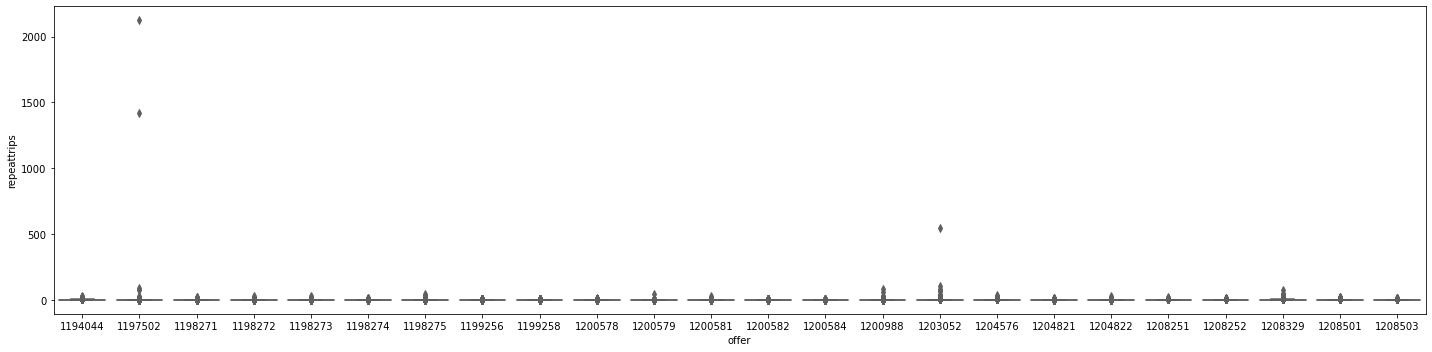

In [76]:
fig, ax =plt.subplots(1, figsize=(20,5))
sns.boxplot(x = history_merge.offer, y = history_merge.repeattrips, palette="Set3")
plt.tight_layout()

The 3 outliers are the same when we analyze using general statistics with the results from the graph above. So it would make sense to remove them from this plot and see how it looks. In offer 1197502 and 1203052 

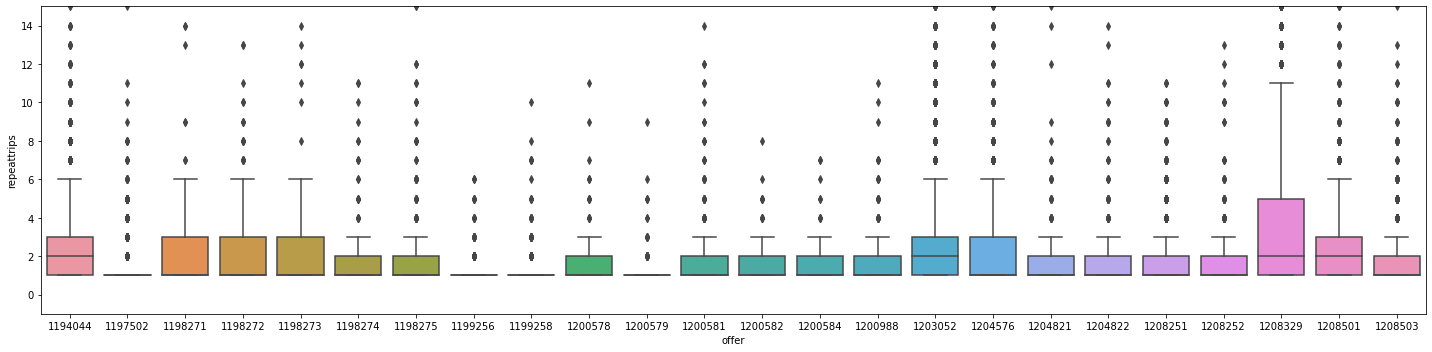

In [77]:
subset = history_merge[history_merge.repeater == 't']
fig, ax =plt.subplots(1, figsize=(20,5))
sns.boxplot(x = subset.offer, y = subset.repeattrips)
plt.ylim(-1, 15)
plt.tight_layout()

This shows that out of those who are repeaters, Offer 044,052,329,501  have median value = 2, rest all have 1.

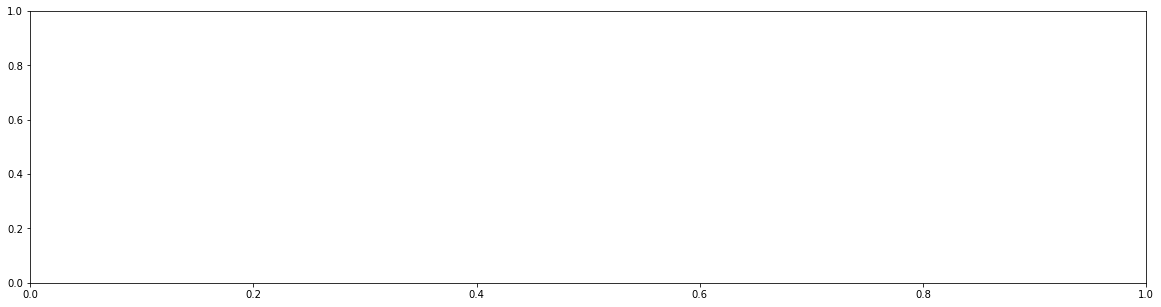

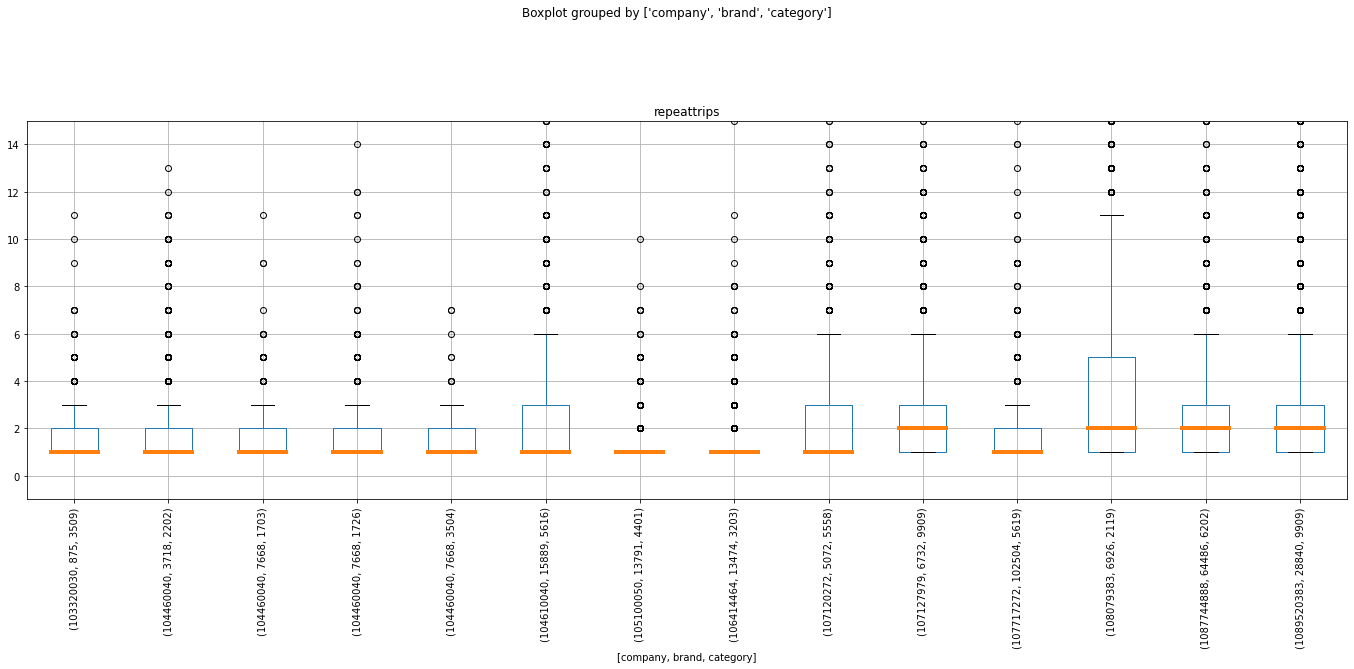

In [78]:
fig, ax =plt.subplots(1, figsize=(20,5))
subset.boxplot(column=['repeattrips'], by=['company','brand','category'], figsize=(20,10), rot=90, medianprops=dict(linestyle='-', linewidth=4))
plt.ylim(-1, 15)
plt.tight_layout(pad=5)

This shows that out of all the unique products that are on offer, 4 of them ahave median repeat trips = 2, rest all of them have 1.

In [5]:
#Read testHistory file
test_history = pd.read_csv('testHistory.csv')
test_history.head()

,id,chain,offer,market,offerdate
0,12262064,95,1219903,39,2013-06-27
1,12277270,95,1221658,39,2013-06-23
2,12332190,95,1213242,39,2013-06-15
3,12524696,4,1221665,1,2013-06-20
4,13074629,14,1221658,8,2013-06-21


In [80]:
test_history.shape

(151484, 5)

In [81]:
test_history.isnull().sum()

id           0
chain        0
offer        0
market       0
offerdate    0
dtype: int64

In [82]:
test_history.duplicated().sum()

0

In [83]:
test_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151484 entries, 0 to 151483
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         151484 non-null  int64 
 1   chain      151484 non-null  int64 
 2   offer      151484 non-null  int64 
 3   market     151484 non-null  int64 
 4   offerdate  151484 non-null  object
dtypes: int64(4), object(1)
memory usage: 5.8+ MB


In [6]:
test_history['offerdate'] = pd.to_datetime(test_history['offerdate'])
test_history['offerdate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 151484 entries, 0 to 151483
Series name: offerdate
Non-Null Count   Dtype         
--------------   -----         
151484 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.2 MB


In [85]:
# To check if there are any common customers in train and test data
columns = ['id','chain','market','offer']
for c in columns:
    train = history[c]
    test = test_history[c]
    print('Common', c, len(set(train).intersection(set(test))))

Common id 0
Common chain 127
Common market 34
Common offer 16


In [86]:
print('Ending date: ',test_history.offerdate.max())
print('Starting date: ',test_history.offerdate.min())
print('Offers were given in ', test_history.offerdate.max() - test_history.offerdate.min(), ' period')

Ending date:  2013-07-31 00:00:00
Starting date:  2013-05-01 00:00:00
Offers were given in  91 days 00:00:00  period


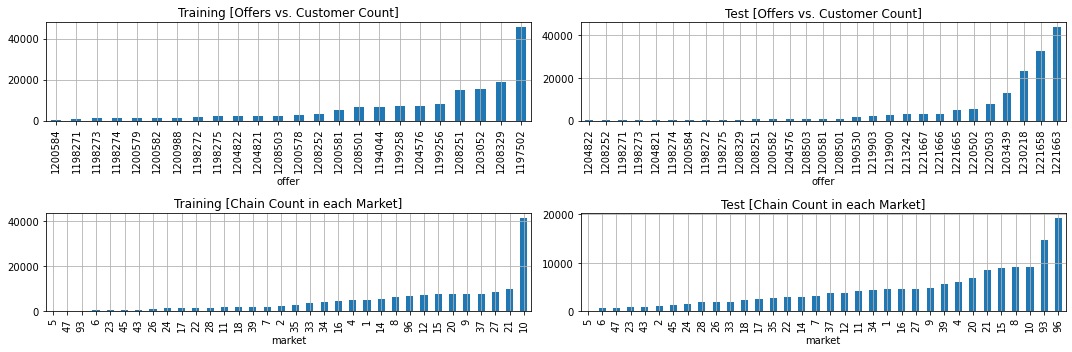

In [87]:
fig, axes = plt.subplots(2,2, figsize=(15,5))
history_group = history.groupby('offer')['id'].count().sort_values()
history_group.plot(kind='bar', title='Training [Offers vs. Customer Count]', grid=True, ax=axes[0,0])

test_history_group = test_history.groupby('offer')['id'].count().sort_values()
test_history_group.plot(kind='bar', title='Test [Offers vs. Customer Count]', grid=True, ax=axes[0,1])

history_group_mc = history.groupby('market')['chain'].count().sort_values()
history_group_mc.plot(kind='bar', title='Training [Chain Count in each Market]', grid=True, ax=axes[1,0])

test_history_group_mc = test_history.groupby('market')['chain'].count().sort_values()
test_history_group_mc.plot(kind='bar', title='Test [Chain Count in each Market]', grid=True, ax=axes[1,1])

plt.tight_layout()

This is show not much correlation between training & test dataset in terms of offers and markets

In [8]:
pred_history = test_history.merge(offers, on='offer')
pred_history.head()

,id,chain,offer,market,offerdate,category,quantity,company,offervalue,brand
0,12262064,95,1219903,39,2013-06-27,799,1,1076211171,1.5,17286
1,15575309,17,1219903,4,2013-07-05,799,1,1076211171,1.5,17286
2,18985721,4,1219903,1,2013-07-15,799,1,1076211171,1.5,17286
3,20552767,14,1219903,8,2013-06-29,799,1,1076211171,1.5,17286
4,21323129,4,1219903,1,2013-06-28,799,1,1076211171,1.5,17286


In [89]:
pred_history.shape

(151484, 10)

In [90]:
comp_tmp = history_merge.company
comp_tmp1 = pred_history.company
comp_tmp = comp_tmp.append(comp_tmp1)
comp_tmp = comp_tmp.unique()
comp_tmp = set(comp_tmp)

brand_tmp = history_merge.brand
brand_tmp1 = pred_history.brand
brand_tmp = brand_tmp.append(brand_tmp1)
brand_tmp = brand_tmp.unique()
brand_tmp = set(brand_tmp)

cat_tmp = history_merge.category
cat_tmp1 = pred_history.category
cat_tmp = cat_tmp.append(cat_tmp1)
cat_tmp = cat_tmp.unique()
cat_tmp = set(cat_tmp)

import modin.pandas as mpd

transactions = pd.DataFrame(columns=['id','chain','dept','category','company','brand','date','productsize','productmeasure','purchasequantity','purchaseamount'])
chunk_size = 2 * (10 ** 7)
unique_set_tr = set()
count = 0
for chunk in mpd.read_csv('transactions.csv', chunksize = chunk_size):
    internal_transactions = chunk.loc[(chunk['company'].isin(comp_tmp)) & 
                                      (chunk['brand'].isin(brand_tmp)) & 
                                      (chunk['category'].isin(cat_tmp))]
    internal_transactions.to_csv('transactions_offer_'+str(count)+'.csv')
    count = count + 1
    print(count)

transactions = pd.read_csv('transactions.csv')
transactions.head(5)

In [9]:
sampleSubmission = pd.read_csv('sampleSubmission.csv')
sampleSubmission.head()

,id,repeatProbability
0,12262064,0
1,12277270,0
2,12332190,0
3,12524696,0
4,13074629,0


In [10]:
sampleSubmission.isnull().sum()

id                   0
repeatProbability    0
dtype: int64

In [11]:
sampleSubmission.sort_values(by = 'repeatProbability', ascending = False).head()

,id,repeatProbability
0,12262064,0
101001,3636697609,0
100985,3636689029,0
100986,3636690312,0
100987,3636690590,0


## --------------------------------------------- Transaction Offer ----------------------------------------------------------

In [7]:
transactionOffer = pd.read_csv('transactions_offer_0.csv')
transactionOffer.head()

,Unnamed: 0,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount
0,238,86246,205,99,9909,107127979,6732,2012-03-17,7.0,OZ,2,8.38
1,308,86246,205,99,9909,107127979,6732,2012-03-21,10.0,OZ,1,3.69
2,397,86246,205,99,9909,107127979,6732,2012-03-25,9.8,OZ,1,3.99
3,475,86246,205,35,3509,103320030,875,2012-03-31,50.0,OZ,1,5.89
4,579,86246,205,99,9909,107127979,6732,2012-04-04,7.0,OZ,1,4.19


In [8]:
offers.head()

,offer,category,quantity,company,offervalue,brand
0,1190530,9115,1,108500080,5.00,93904
1,1194044,9909,1,107127979,1.00,6732
2,1197502,3203,1,106414464,0.75,13474
3,1198271,5558,1,107120272,1.50,5072
4,1198272,5558,1,107120272,1.50,5072


In [15]:
history.head()

,id,chain,offer,market,repeattrips,repeater,offerdate
0,86246,205,1208251,34,5,t,2013-04-24
1,86252,205,1197502,34,16,t,2013-03-27
2,12682470,18,1197502,11,0,f,2013-03-28
3,12996040,15,1197502,9,0,f,2013-03-25
4,13089312,15,1204821,9,0,f,2013-04-01


In [16]:
test_history.head()

,id,chain,offer,market,offerdate
0,12262064,95,1219903,39,2013-06-27
1,12277270,95,1221658,39,2013-06-23
2,12332190,95,1213242,39,2013-06-15
3,12524696,4,1221665,1,2013-06-20
4,13074629,14,1221658,8,2013-06-21


In [17]:
transactionOffer.isnull().sum()

Unnamed: 0          0
id                  0
chain               0
dept                0
category            0
company             0
brand               0
date                0
productsize         0
productmeasure      0
purchasequantity    0
purchaseamount      0
dtype: int64

In [18]:
transactionOffer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279183 entries, 0 to 279182
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        279183 non-null  int64  
 1   id                279183 non-null  int64  
 2   chain             279183 non-null  int64  
 3   dept              279183 non-null  int64  
 4   category          279183 non-null  int64  
 5   company           279183 non-null  int64  
 6   brand             279183 non-null  int64  
 7   date              279183 non-null  object 
 8   productsize       279183 non-null  float64
 9   productmeasure    279183 non-null  object 
 10  purchasequantity  279183 non-null  int64  
 11  purchaseamount    279183 non-null  float64
dtypes: float64(2), int64(8), object(2)
memory usage: 25.6+ MB


In [9]:
transactionOffer['date'] = pd.to_datetime(transactionOffer['date'])
transactionOffer['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 279183 entries, 0 to 279182
Series name: date
Non-Null Count   Dtype         
--------------   -----         
279183 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.1 MB


In [21]:
transactionOffer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279183 entries, 0 to 279182
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0        279183 non-null  int64         
 1   id                279183 non-null  int64         
 2   chain             279183 non-null  int64         
 3   dept              279183 non-null  int64         
 4   category          279183 non-null  int64         
 5   company           279183 non-null  int64         
 6   brand             279183 non-null  int64         
 7   date              279183 non-null  datetime64[ns]
 8   productsize       279183 non-null  float64       
 9   productmeasure    279183 non-null  object        
 10  purchasequantity  279183 non-null  int64         
 11  purchaseamount    279183 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(8), object(1)
memory usage: 25.6+ MB


In [22]:
transactionOffer.nunique()

Unnamed: 0          279183
id                   18262
chain                   18
dept                    15
category                18
company                 16
brand                   17
date                   509
productsize             86
productmeasure           3
purchasequantity        18
purchaseamount        2566
dtype: int64

In [24]:
transactionOffer.describe(include='all')

,Unnamed: 0,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount
count,2.791830e+05,2.791830e+05,279183.000000,279183.000000,279183.000000,2.791830e+05,279183.000000,279183,279183.000000,279183,279183.000000,279183.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,509,NaN,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-17 00:00:00,NaN,OZ,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1106,NaN,272621,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-03-02 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-07-23 00:00:00,NaN,NaN,NaN,NaN
mean,1.010639e+07,1.267152e+08,27.294105,82.895230,8299.252691,1.069681e+08,7761.730815,NaN,16.132700,NaN,1.198852,3.522153
std,5.788578e+06,2.231027e+07,30.852715,25.674751,2566.280418,2.692872e+07,6301.920937,NaN,22.803264,NaN,0.500297,2.509158
min,2.380000e+02,8.624600e+04,3.000000,7.000000,706.000000,1.033200e+08,875.000000,NaN,0.750000,NaN,-3.000000,-83.510000
25%,5.074480e+06,1.209702e+08,15.000000,72.000000,7205.000000,1.046100e+08,6732.000000,NaN,6.670000,NaN,1.000000,2.290000


In [25]:
transactionOffer.corr(numeric_only = True)

,Unnamed: 0,id,chain,dept,category,company,brand,productsize,purchasequantity,purchaseamount
Unnamed: 0,1.000000,0.870873,-0.020018,0.005461,0.005464,0.002409,0.005971,-0.008718,0.010523,0.003209
id,0.870873,1.000000,-0.027205,0.004898,0.004900,0.001671,0.010206,-0.007761,0.009185,0.000344
chain,-0.020018,-0.027205,1.000000,0.049350,0.049338,-0.013914,-0.034381,-0.004870,-0.015890,-0.104363
dept,0.005461,0.004898,0.049350,1.000000,0.999999,0.058720,-0.175352,-0.510485,0.052501,-0.301390
category,0.005464,0.004900,0.049338,0.999999,1.000000,0.058732,-0.175039,-0.510538,0.052515,-0.301358
company,0.002409,0.001671,-0.013914,0.058720,0.058732,1.000000,0.093182,-0.032891,-0.001902,-0.003399
brand,0.005971,0.010206,-0.034381,-0.175352,-0.175039,0.093182,1.000000,-0.178936,-0.043053,0.083285
productsize,-0.008718,-0.007761,-0.004870,-0.510485,-0.510538,-0.032891,-0.178936,1.000000,-0.025860,0.391702
purchasequantity,0.010523,0.009185,-0.015890,0.052501,0.052515,-0.001902,-0.043053,-0.025860,1.000000,0.381196
purchaseamount,0.003209,0.000344,-0.104363,-0.301390,-0.301358,-0.003399,0.083285,0.391702,0.381196,1.000000


In [26]:
transactionOffer.columns

Index(['Unnamed: 0', 'id', 'chain', 'dept', 'category', 'company', 'brand',
       'date', 'productsize', 'productmeasure', 'purchasequantity',
       'purchaseamount'],
      dtype='object')

In [27]:
import seaborn as sns

In [32]:
transactionOffer.shape

(279183, 12)

In [42]:
transactionOffer[['company','brand', 'purchasequantity']].value_counts()

company     brand  purchasequantity
107127979   6732    1                  152195
                    2                   32148
104610040   15889   1                   26433
103320030   875     1                   16892
103700030   4294    1                   13603
                                        ...  
107120272   5072    4                       1
107127979   6732   -3                       1
105190050   26456   5                       1
104460040   3718    11                      1
1089520383  28840   3                       1
Length: 121, dtype: int64

Based on above:
- Company that have a lot of purchase quantity is 107127979 with the brand 6732

In [34]:
transactionOffer.sort_values(by='purchasequantity', ascending=False)

,Unnamed: 0,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount
210995,15253997,139864599,4,17,1726,104460040,3718,2012-08-14,75.00,CT,15,71.85
211964,15323733,139949138,4,72,7205,103700030,4294,2012-09-02,5.80,OZ,13,60.97
128013,9370508,125579739,15,99,9909,107127979,6732,2012-08-28,9.00,OZ,12,12.00
112647,8242232,124525716,15,99,9909,107127979,6732,2012-03-15,6.50,OZ,12,45.48
202645,14651195,139117031,17,35,3509,103320030,875,2013-04-26,21.16,OZ,12,30.88
...,...,...,...,...,...,...,...,...,...,...,...,...
194697,14089520,138121381,88,72,7205,103700030,4294,2013-07-16,5.80,OZ,-2,-6.98
187071,13545391,137090551,15,99,9909,107127979,6732,2012-11-29,11.00,OZ,-2,-5.58
12470,945595,94244413,4,99,9909,107127979,6732,2012-12-10,10.00,OZ,-2,-11.18
278446,19960667,190635018,95,99,9909,107127979,6732,2012-07-09,11.00,OZ,-2,-4.58


In [51]:
valued_transaction = transactionOffer.groupby(['company','category','brand','dept'])['purchasequantity'].count().sort_values(ascending=False)
valued_transaction

company     category  brand  dept
107127979   9909      6732   99      188212
104610040   5616      15889  56       30243
103700030   7205      4294   72       15635
103320030   3509      875    35       14159
106414464   3203      13474  32        7311
103320030   7205      875    72        6589
104460040   1726      3718   17        5570
104127141   706       26189  7         3149
104460040   1703      3718   17        2448
107106878   5122      17311  51        1388
105450050   5122      1322   51         858
108500080   9115      93904  91         793
105450050   5824      1322   58         790
            4517      1322   45         657
105100050   4401      13791  44         628
1089520383  9909      28840  99         208
104460040   1726      7668   17         199
105190050   5824      26456  58         163
104460040   1703      7668   17          91
107120272   5558      5072   55          50
108079383   2119      6926   21          38
104460040   3504      7668   35           

**The company 107127979 have purchased 188212 times**

In [53]:
valued_transaction_price = transactionOffer.groupby(['company','category','brand','dept'])['purchaseamount'].sum().sort_values(ascending=False)
valued_transaction_price

company     category  brand  dept
107127979   9909      6732   99      567884.00
104610040   5616      15889  56      113772.22
103320030   3509      875    35      100815.55
103700030   7205      4294   72       59727.69
104460040   1726      3718   17       27898.21
106414464   3203      13474  32       27566.90
103320030   7205      875    72       23925.79
104127141   706       26189  7        13319.96
104460040   1703      3718   17        9452.67
108500080   9115      93904  91        9315.73
107106878   5122      17311  51        8667.55
105450050   4517      1322   45        6849.37
            5824      1322   58        4556.64
            5122      1322   51        3401.03
105100050   4401      13791  44        2766.19
1089520383  9909      28840  99         929.53
105190050   5824      26456  58         894.87
104460040   1726      7668   17         737.65
            1703      7668   17         422.58
107120272   5558      5072   55         258.74
108079383   2119      6926

**The company 107127979 have purchased $567,884**

In [54]:
from scipy import stats

In [55]:
transactionOffer.columns

Index(['Unnamed: 0', 'id', 'chain', 'dept', 'category', 'company', 'brand',
       'date', 'productsize', 'productmeasure', 'purchasequantity',
       'purchaseamount'],
      dtype='object')

In [57]:
pearson_coef, p_value = stats.pearsonr(transactionOffer['brand'], transactionOffer['purchaseamount'])
print("The Pearson Coefficient Correlation:", pearson_coef,"The P-Value:", p_value)

The Pearson Coefficient Correlation: 0.08328535066392015 The P-Value: 0.0


Brand have weak positif correlation with the purchaseamount and have statically significant.

## ANOVA

In [87]:
group_test1 = transactionOffer[['brand', 'purchaseamount']].groupby('brand').sum().sort_values(by='purchaseamount',ascending=False)
#group_test1 = transactionOffer.groupby(['brand'])['purchaseamount']
group_test1.head()

,purchaseamount
brand,
6732,567884.00
875,124741.34
15889,113772.22
4294,59727.69
3718,37359.27


In [77]:
group_test1

,purchaseamount
brand,
6732,567884.00
875,124741.34
15889,113772.22
4294,59727.69
3718,37359.27
13474,27566.90
1322,14807.04
26189,13319.96
93904,9315.73


In [91]:
gptest1=transactionOffer[['brand','purchaseamount']].groupby(['brand'])
gptest1.head()

,brand,purchaseamount
0,6732,8.38
1,6732,3.69
2,6732,3.99
3,875,5.89
4,6732,4.19
...,...,...
6672,5072,4.99
12609,5072,4.99
17268,5072,3.99
27816,5072,3.99


In [95]:
gtest1 = gptest1.get_group(6732)['purchaseamount']
gtest2 = gptest1.get_group(875)['purchaseamount']
gtest3 = gptest1.get_group(15889)['purchaseamount']

In [97]:
f_value, p_value = stats.f_oneway(gtest1,gtest2,gtest3)
print("F-Score:", f_value,"and P-Value:", p_value)

F-Score: 17076.36822878427 and P-Value: 0.0


**This is a great result with a large F-test score showing a strong correlation and a P-value of 0 implying almost certain statistical significance.**

In [98]:
f_value, p_value = stats.f_oneway(gtest1,gtest2)
print("F-Score:", f_value,"and P-Value:", p_value)

F-Score: 31773.134617523425 and P-Value: 0.0


In [99]:
f_value, p_value = stats.f_oneway(gtest1,gtest3)
print("F-Score:", f_value,"and P-Value:", p_value)

F-Score: 3499.3702381991075 and P-Value: 0.0


In [100]:
f_value, p_value = stats.f_oneway(gtest2,gtest3)
print("F-Score:", f_value,"and P-Value:", p_value)

F-Score: 7607.184407396987 and P-Value: 0.0


*Based on the ANOVA analysis data above, it can be concluded that the brand is statistically significant to the purchase amount. So, the brands that are most in demand by buyers are considered to be reproduced in order to get loyal customers.*

In [11]:
historyOffer = pd.merge(history, offers, on='offer', how='left')
historyOffer

,id,chain,offer,market,repeattrips,repeater,offerdate,category,quantity,company,offervalue,brand
0,86246,205,1208251,34,5,t,2013-04-24,2202,1,104460040,2.00,3718
1,86252,205,1197502,34,16,t,2013-03-27,3203,1,106414464,0.75,13474
2,12682470,18,1197502,11,0,f,2013-03-28,3203,1,106414464,0.75,13474
3,12996040,15,1197502,9,0,f,2013-03-25,3203,1,106414464,0.75,13474
4,13089312,15,1204821,9,0,f,2013-04-01,5619,1,107717272,1.50,102504
...,...,...,...,...,...,...,...,...,...,...,...,...
160052,4712158291,214,1208329,8,0,f,2013-04-22,2119,1,108079383,1.00,6926
160053,4715039820,166,1208329,14,0,f,2013-04-24,2119,1,108079383,1.00,6926
160054,4797277036,152,1203052,10,6,t,2013-04-02,9909,1,1089520383,1.00,28840
160055,4804019740,153,1204822,12,0,f,2013-04-17,5619,1,107717272,1.50,102504


In [19]:
hoTransactionOffer = pd.merge(transactionOffer, historyOffer, on = 'id', how='inner')
hoTransactionOffer

,Unnamed: 0,id,chain_x,dept,category_x,company_x,brand_x,date,productsize,productmeasure,...,offer,market,repeattrips,repeater,offerdate,category_y,quantity,company_y,offervalue,brand_y
0,238,86246,205,99,9909,107127979,6732,2012-03-17,7.0,OZ,...,1208251,34,5,t,2013-04-24,2202,1,104460040,2.0,3718
1,308,86246,205,99,9909,107127979,6732,2012-03-21,10.0,OZ,...,1208251,34,5,t,2013-04-24,2202,1,104460040,2.0,3718
2,397,86246,205,99,9909,107127979,6732,2012-03-25,9.8,OZ,...,1208251,34,5,t,2013-04-24,2202,1,104460040,2.0,3718
3,475,86246,205,35,3509,103320030,875,2012-03-31,50.0,OZ,...,1208251,34,5,t,2013-04-24,2202,1,104460040,2.0,3718
4,579,86246,205,99,9909,107127979,6732,2012-04-04,7.0,OZ,...,1208251,34,5,t,2013-04-24,2202,1,104460040,2.0,3718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97069,19997295,195026579,108,32,3203,106414464,13474,2013-03-13,5.0,OZ,...,1208251,10,0,f,2013-04-27,2202,1,104460040,2.0,3718
97070,19997306,195026579,108,99,9909,107127979,6732,2013-03-13,6.0,OZ,...,1208251,10,0,f,2013-04-27,2202,1,104460040,2.0,3718
97071,19997337,195026579,108,99,9909,107127979,6732,2013-03-21,10.0,OZ,...,1208251,10,0,f,2013-04-27,2202,1,104460040,2.0,3718
97072,19997339,195026579,108,99,9909,107127979,6732,2013-03-21,6.0,OZ,...,1208251,10,0,f,2013-04-27,2202,1,104460040,2.0,3718


In [20]:
hoTransactionOffer['revenue'] = hoTransactionOffer['purchasequantity']*hoTransactionOffer['purchaseamount']

In [21]:
hoTransactionOffer

,Unnamed: 0,id,chain_x,dept,category_x,company_x,brand_x,date,productsize,productmeasure,...,market,repeattrips,repeater,offerdate,category_y,quantity,company_y,offervalue,brand_y,revenue
0,238,86246,205,99,9909,107127979,6732,2012-03-17,7.0,OZ,...,34,5,t,2013-04-24,2202,1,104460040,2.0,3718,16.76
1,308,86246,205,99,9909,107127979,6732,2012-03-21,10.0,OZ,...,34,5,t,2013-04-24,2202,1,104460040,2.0,3718,3.69
2,397,86246,205,99,9909,107127979,6732,2012-03-25,9.8,OZ,...,34,5,t,2013-04-24,2202,1,104460040,2.0,3718,3.99
3,475,86246,205,35,3509,103320030,875,2012-03-31,50.0,OZ,...,34,5,t,2013-04-24,2202,1,104460040,2.0,3718,5.89
4,579,86246,205,99,9909,107127979,6732,2012-04-04,7.0,OZ,...,34,5,t,2013-04-24,2202,1,104460040,2.0,3718,4.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97069,19997295,195026579,108,32,3203,106414464,13474,2013-03-13,5.0,OZ,...,10,0,f,2013-04-27,2202,1,104460040,2.0,3718,3.29
97070,19997306,195026579,108,99,9909,107127979,6732,2013-03-13,6.0,OZ,...,10,0,f,2013-04-27,2202,1,104460040,2.0,3718,3.59
97071,19997337,195026579,108,99,9909,107127979,6732,2013-03-21,10.0,OZ,...,10,0,f,2013-04-27,2202,1,104460040,2.0,3718,10.00
97072,19997339,195026579,108,99,9909,107127979,6732,2013-03-21,6.0,OZ,...,10,0,f,2013-04-27,2202,1,104460040,2.0,3718,2.50


In [46]:
gp_hoTO = hoTransactionOffer.groupby('brand_x')['company_x','revenue']
gp_hoTO.head()

,company_x,revenue
0,107127979,16.76
1,107127979,3.69
2,107127979,3.99
3,103320030,5.89
4,107127979,4.19
...,...,...
45718,105190050,4.99
48374,108500080,7.00
48376,108500080,11.89
49292,107120272,4.99


In [48]:
gp_hoTO.max(['revenue'])

,company_x,revenue
brand_x,,
875,103320030,349.50
1322,105450050,359.64
3718,104460040,301.29
4294,103700030,220.24
5072,107120272,4.99
6732,107127979,363.69
6926,108079383,6.76
7668,104460040,47.84
13474,106414464,89.75


- The companies that have a high chance of becoming a valuable customer are: 107127979, 105450050, and 103320030
- The products that are an opportunity to get high revenue are 6732, 1322, and 875.

In [43]:
gp_hoTO.min()

,company_x,brand_x,revenue
brand_x,,,
875,103320030,875,-50.33
1322,105450050,1322,-44.96
3718,104460040,3718,-20.17
4294,103700030,4294,-63.16
5072,107120272,5072,4.99
6732,107127979,6732,-88.42
6926,108079383,6926,1.25
7668,104460040,7668,-0.01
13474,106414464,13474,-18.87


In [53]:
hoTransactionOffer['brand_x'].value_counts()

6732     64145
15889    12028
4294      7927
875       5219
3718      3257
13474     2045
26189      807
1322       694
17311      470
13791      222
7668       120
28840      104
93904       19
6926        12
26456        4
5072         1
Name: brand_x, dtype: int64

# Conclusion

- The companies that have a high chance of becoming a valuable customer are: 107127979, 105450050, and 103320030
- The products that are an opportunity to get high revenue are 6732, 1322, and 875
- Company that have a lot of purchase quantity is 107127979 with the brand 6732
- The company 107127979 have purchased 188212 times
- The top company by offer is 104460040
- The top category by offer is 5558 and 7205
- The top brand by offer is 4294
- Companies ending with 7979, 9383, 0383 have higher % of repeat customers than others
- Brand 6732, 6926, 28840 have the higher % repeat customers than others
- Catogories 2119, 9909 have higher % of repeat customers than other
- When combine all of them together to see exactly which product is getting higher repeat customers than average (7979,6732,9909), (9383,6926,2119) comes out to be the best ones. This shows is the same pattern as we saw individually in Company, Brand and Category

**Conclusion:**
1. The company that have an opportunity as a big buyer is **107127979 with the total revenue of $363.69**
2. The product that have an interested in buying is 6732, **1322, and 875**
3. The companies ending with **7979, 9383, 0383 have higher % of repeat customers than others**
4. Products greatly affect the number of purchases and visitors to the store, so we must provide stock of products that are in great demand so that visitors can visit and buy products in our store.

In [54]:
hoTransactionOffer.to_csv('hoTransactionOffer.csv')